In [1]:
# cài đặt thư viện cần thiết
!pip install sklearn fuzzy-c-means

In [2]:
# load thư viện cần thiết

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from fcmeans import FCM

In [3]:
# random state
rs = 12

In [4]:
# đọc dữ liệu
df = pd.read_csv('../data/rfm_data.csv')
df

,CustomerID,Recency,Frequency,Moneytary
0,101000281,0.0,0.030488,0.143221
1,101000282,0.0,0.018293,0.010731
2,101000283,0.0,0.024390,0.013413
3,101000320,0.0,0.000000,0.005365
4,101000325,0.0,0.000000,0.026923
...,...,...,...,...
12359,107000620,1.0,0.000000,0.015385
12360,107000623,1.0,0.000000,0.002683
12361,107000624,1.0,0.000000,0.015385
12362,107000625,1.0,0.000000,0.015385


In [5]:
# load trọng số lên
rfm_weight = pd.read_csv('../data/rfm_weight.csv')
rfm_weight

,variable,weight
0,Recency,0.137
1,Frequency,0.328
2,Moneytary,0.535


In [6]:
# lấy trọng số ra
w = rfm_weight.set_index('variable').to_dict()['weight']
w

{'Recency': 0.137, 'Frequency': 0.328, 'Moneytary': 0.535}

In [7]:
# nhân trọng số vào mỗi cột
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x * w[x.name])

In [8]:
df

,CustomerID,Recency,Frequency,Moneytary
0,101000281,0.000,0.010,0.076623
1,101000282,0.000,0.006,0.005741
2,101000283,0.000,0.008,0.007176
3,101000320,0.000,0.000,0.002870
4,101000325,0.000,0.000,0.014404
...,...,...,...,...
12359,107000620,0.137,0.000,0.008231
12360,107000623,0.137,0.000,0.001435
12361,107000624,0.137,0.000,0.008231
12362,107000625,0.137,0.000,0.008231


## Chuẩn bị dữ liệu

In [9]:
cust_id = df.iloc[:, 0].values
X = df.iloc[:, 1:].values
cust_id, X

(array([101000281, 101000282, 101000283, ..., 107000624, 107000625,
        107000626], dtype=int64),
 array([[0.        , 0.01      , 0.07662332],
        [0.        , 0.006     , 0.00574096],
        [0.        , 0.008     , 0.0071762 ],
        ...,
        [0.137     , 0.        , 0.00823077],
        [0.137     , 0.        , 0.00823077],
        [0.137     , 0.        , 0.00823077]]))

# Phân cụm

## KMeans

In [10]:
# dùng thang đo silhouette để chọn số cụm
# để số cụm từ 3 -> 10

range_k = np.arange(2, 11)
range_k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
def make_kmean(k: int):
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    cluster_labels = model.predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    print(f"K: {k} done")
    return dict(
        k=k,
        cluster_labels=cluster_labels,
        sil_score=sil_score
    )

In [12]:
kmean_final_cluster = [make_kmean(k) for k in range_k]

K: 2 done
K: 3 done
K: 4 done
K: 5 done
K: 6 done
K: 7 done
K: 8 done
K: 9 done
K: 10 done


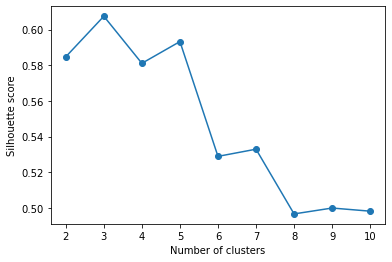

In [13]:
sil_scores = np.array([i['sil_score'] for i in kmean_final_cluster])

plt.plot(range_k, sil_scores)
plt.scatter(range_k, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.savefig('Kmean sil plot.png')
plt.show()

In [14]:
# sắp xếp các mô hình KMean theo chỉ số sihouette (từ cao xuống thấp)
sorted_kmean_final_cluster = sorted(kmean_final_cluster, key=lambda x: x['sil_score'], reverse=True)

In [15]:
sorted_kmean_final_cluster

[{'k': 3,
  'cluster_labels': array([1, 1, 1, ..., 0, 0, 0]),
  'sil_score': 0.6075207903276492},
 {'k': 5,
  'cluster_labels': array([1, 1, 1, ..., 0, 0, 0]),
  'sil_score': 0.593300958414965},
 {'k': 2,
  'cluster_labels': array([1, 1, 1, ..., 0, 0, 0]),
  'sil_score': 0.5847567663115765},
 {'k': 4,
  'cluster_labels': array([1, 1, 1, ..., 3, 3, 3]),
  'sil_score': 0.5810994316918033},
 {'k': 7,
  'cluster_labels': array([1, 1, 1, ..., 3, 3, 3]),
  'sil_score': 0.5328877622788198},
 {'k': 6,
  'cluster_labels': array([1, 1, 1, ..., 4, 4, 4]),
  'sil_score': 0.5288584863057997},
 {'k': 9,
  'cluster_labels': array([2, 2, 2, ..., 3, 3, 3]),
  'sil_score': 0.4998517844064243},
 {'k': 10,
  'cluster_labels': array([8, 1, 1, ..., 2, 2, 2]),
  'sil_score': 0.4980894665595096},
 {'k': 8,
  'cluster_labels': array([0, 0, 0, ..., 6, 6, 6]),
  'sil_score': 0.4965495399564288}]

In [16]:
# lấy mô hình có giá trị sihouette tốt nhất

best_k_kmean = sorted_kmean_final_cluster[0]['k']
kmean_cluster_labels = sorted_kmean_final_cluster[0]['cluster_labels']
kmean_sil_score = sorted_kmean_final_cluster[0]['sil_score']
print(f'Số cụm tốt nhất cho KMeans là {best_k_kmean} với giá trị sihouette: {kmean_sil_score}')

Số cụm tốt nhất cho KMeans là 3 với giá trị sihouette: 0.6075207903276492


In [17]:
# chạy lại model
print(f"Chạy lại model với K = {best_k_kmean} cho K Means")
model = KMeans(n_clusters=best_k_kmean, random_state=rs)
model.fit(X)

Chạy lại model với K = 3 cho K Means


KMeans(n_clusters=3, random_state=12)

In [18]:
kmean_cluster_df = pd.DataFrame(
    {'CustomerID': cust_id, 'Cluster Label': kmean_cluster_labels}
)
df_merged_kmean = df.merge(kmean_cluster_df, on='CustomerID')
df_merged_kmean.to_csv('../data/cluster_kmeans.csv', index=False)

In [19]:
print("Trung bình giá trị trên mỗi cụm của KMeans")
df_merged_kmean.groupby('Cluster Label').mean().iloc[:, 1:]

Trung bình giá trị trên mỗi cụm của KMeans


,Recency,Frequency,Moneytary
Cluster Label,,,
0,0.113146,0.001178,0.007411
1,0.040688,0.002238,0.007770
2,0.097109,0.013861,0.159966


In [20]:
print("Số lượng khách hàng mỗi cụm")
kmean_cluster_df.groupby('Cluster Label').count()

Số lượng khách hàng mỗi cụm


,CustomerID
Cluster Label,
0,8302
1,3861
2,201


### Fuzzy C-Mean

In [21]:
def make_fuzzycmean(k: int):
    model = FCM(n_clusters=k, random_state=rs)
    model.fit(X)
    cluster_labels = model.predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    print(f"K: {k} done")
    return dict(
        k=k,
        cluster_labels=cluster_labels,
        sil_score=sil_score
    )

In [22]:
fuzzycmean_final_cluster = [make_fuzzycmean(k) for k in range_k]

K: 2 done
K: 3 done
K: 4 done
K: 5 done
K: 6 done
K: 7 done
K: 8 done
K: 9 done
K: 10 done


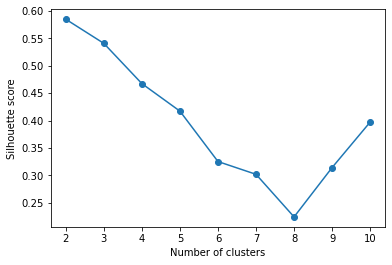

In [23]:
sil_scores = np.array([i['sil_score'] for i in fuzzycmean_final_cluster])

plt.plot(range_k, sil_scores)
plt.scatter(range_k, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.savefig('Fuzzy C-Mean sil plot.png')
plt.show()

In [24]:
# sắp xếp các mô hình Fuzzy C Mean theo chỉ số sihouette (từ cao xuống thấp)
sorted_fuzzycmean_final_cluster = sorted(fuzzycmean_final_cluster, key=lambda x: x['sil_score'], reverse=True)

In [25]:
sorted_fuzzycmean_final_cluster

[{'k': 2,
  'cluster_labels': array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
  'sil_score': 0.584837043388848},
 {'k': 3,
  'cluster_labels': array([2, 2, 2, ..., 0, 0, 0], dtype=int64),
  'sil_score': 0.5408032052238421},
 {'k': 4,
  'cluster_labels': array([2, 2, 2, ..., 0, 0, 0], dtype=int64),
  'sil_score': 0.4674381799537124},
 {'k': 5,
  'cluster_labels': array([3, 3, 3, ..., 4, 4, 4], dtype=int64),
  'sil_score': 0.41723659843049676},
 {'k': 10,
  'cluster_labels': array([7, 7, 7, ..., 8, 8, 8], dtype=int64),
  'sil_score': 0.39727876478274393},
 {'k': 6,
  'cluster_labels': array([1, 1, 1, ..., 3, 3, 3], dtype=int64),
  'sil_score': 0.3253166821451596},
 {'k': 9,
  'cluster_labels': array([7, 7, 7, ..., 2, 2, 2], dtype=int64),
  'sil_score': 0.31433695582113313},
 {'k': 7,
  'cluster_labels': array([2, 2, 2, ..., 6, 6, 6], dtype=int64),
  'sil_score': 0.3019890522130474},
 {'k': 8,
  'cluster_labels': array([6, 6, 6, ..., 2, 2, 2], dtype=int64),
  'sil_score': 0.22430756827606146

In [26]:
# lấy mô hình có giá trị sihouette tốt nhất

best_k_fuzzycmean = sorted_fuzzycmean_final_cluster[0]['k']
fuzzycmean_cluster_labels = sorted_fuzzycmean_final_cluster[0]['cluster_labels']
fuzzycmean_sil_score = sorted_fuzzycmean_final_cluster[0]['sil_score']
print(f'Số cụm tốt nhất cho KMeans là {best_k_fuzzycmean} với giá trị sihouette: {fuzzycmean_sil_score}')

Số cụm tốt nhất cho KMeans là 2 với giá trị sihouette: 0.584837043388848


In [27]:
# chạy lại model
print(f"Chạy lại model với K = {best_k_fuzzycmean} cho Fuzzy C-Mean")
model = FCM(n_clusters=best_k_fuzzycmean, random_state=rs)
model.fit(X)

Chạy lại model với K = 2 cho Fuzzy C-Mean


In [28]:
fuzzycmean_cluster_df = pd.DataFrame(
    {'CustomerID': cust_id, 'Cluster Label': fuzzycmean_cluster_labels}
)
df_merged_fuzzy = df.merge(fuzzycmean_cluster_df, on='CustomerID')
df_merged_fuzzy.to_csv('../data/cluster_fuzzycmean.csv', index=False)

In [29]:
print("Trung bình giá trị trên mỗi cụm của Fuzzy C-Mean")
df_merged_fuzzy.groupby('Cluster Label').mean().iloc[:, 1:]

Trung bình giá trị trên mỗi cụm của Fuzzy C-Mean


,Recency,Frequency,Moneytary
Cluster Label,,,
0,0.113228,0.001335,0.010043
1,0.040742,0.002535,0.009918


In [30]:
print("Số lượng khách hàng mỗi cụm")
fuzzycmean_cluster_df.groupby('Cluster Label').count()

Số lượng khách hàng mỗi cụm


,CustomerID
Cluster Label,
0,8446
1,3918
